##Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

##Reading the Dataset

In [2]:
# prompt: read the file using path
df = pd.read_csv('https://raw.githubusercontent.com/ESWARVANKA/Bank-Loan-Approval/refs/heads/main/bankloan.csv')


In [3]:
display(df)

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


##Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP.Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal.Loan       5000 non-null   int64  
 10  Securities.Account  5000 non-null   int64  
 11  CD.Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.head()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [6]:
df.shape

(5000, 14)

In [7]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal.Loan', 'Securities.Account',
       'CD.Account', 'Online', 'CreditCard'],
      dtype='object')

In [19]:
# Find null values
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP_Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [9]:
df.describe()

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
df.columns = [col.replace('.', '_') for col in df.columns]

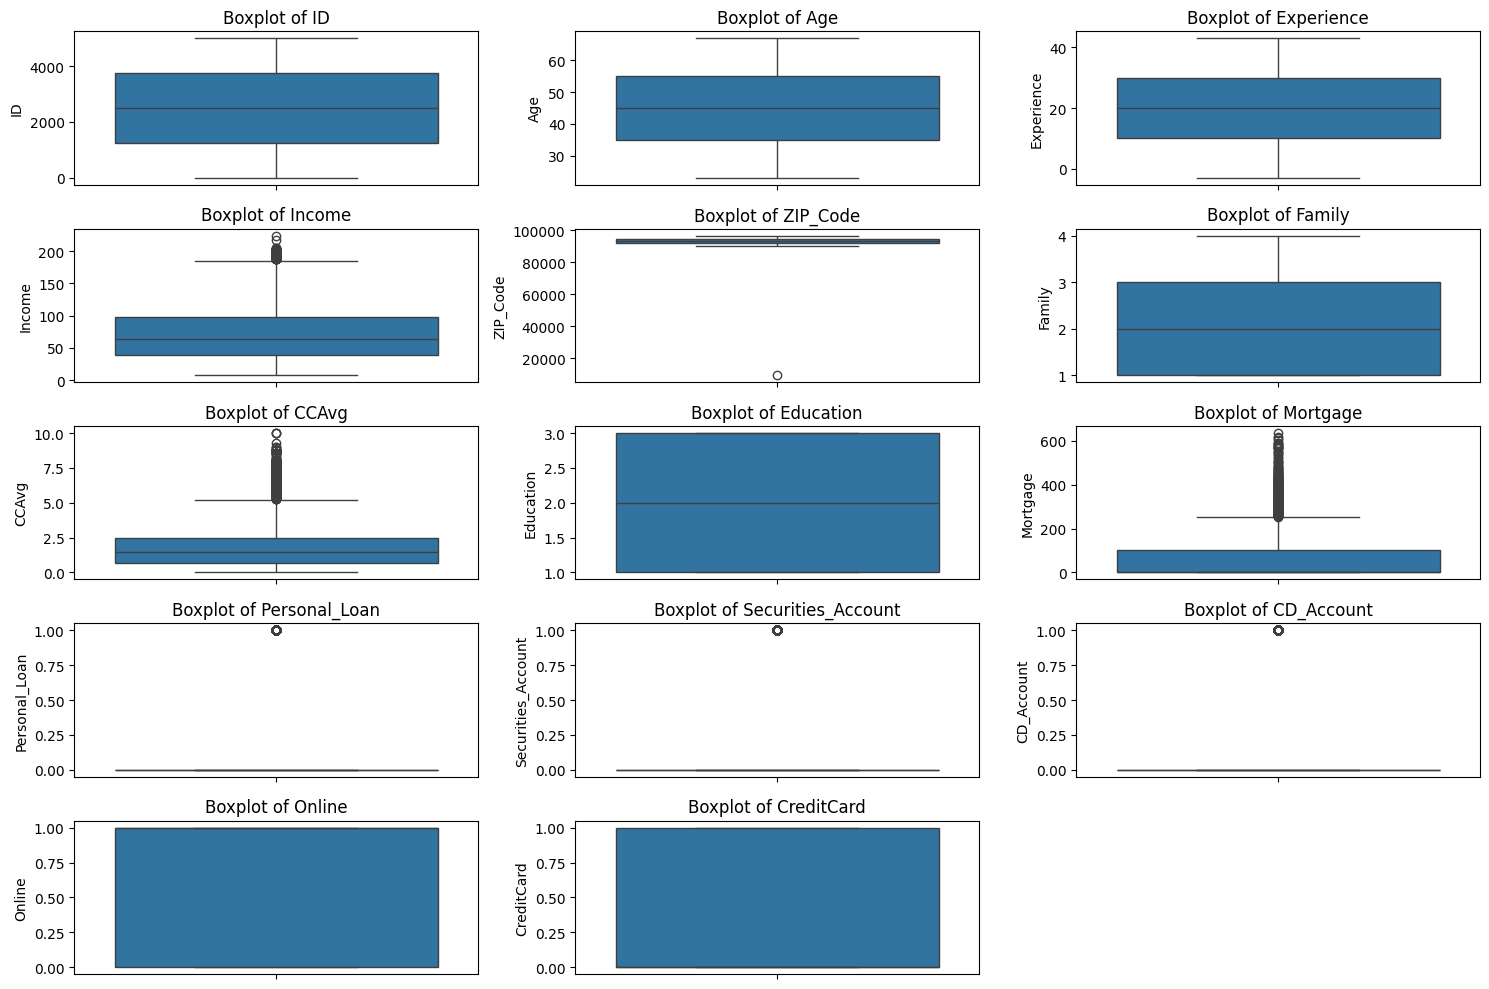

In [11]:
numerical_features = df.select_dtypes(include=['number']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_features):
    plt.subplot(len(numerical_features) // 3 + 1, 3, i + 1)  # Adjust layout as needed
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

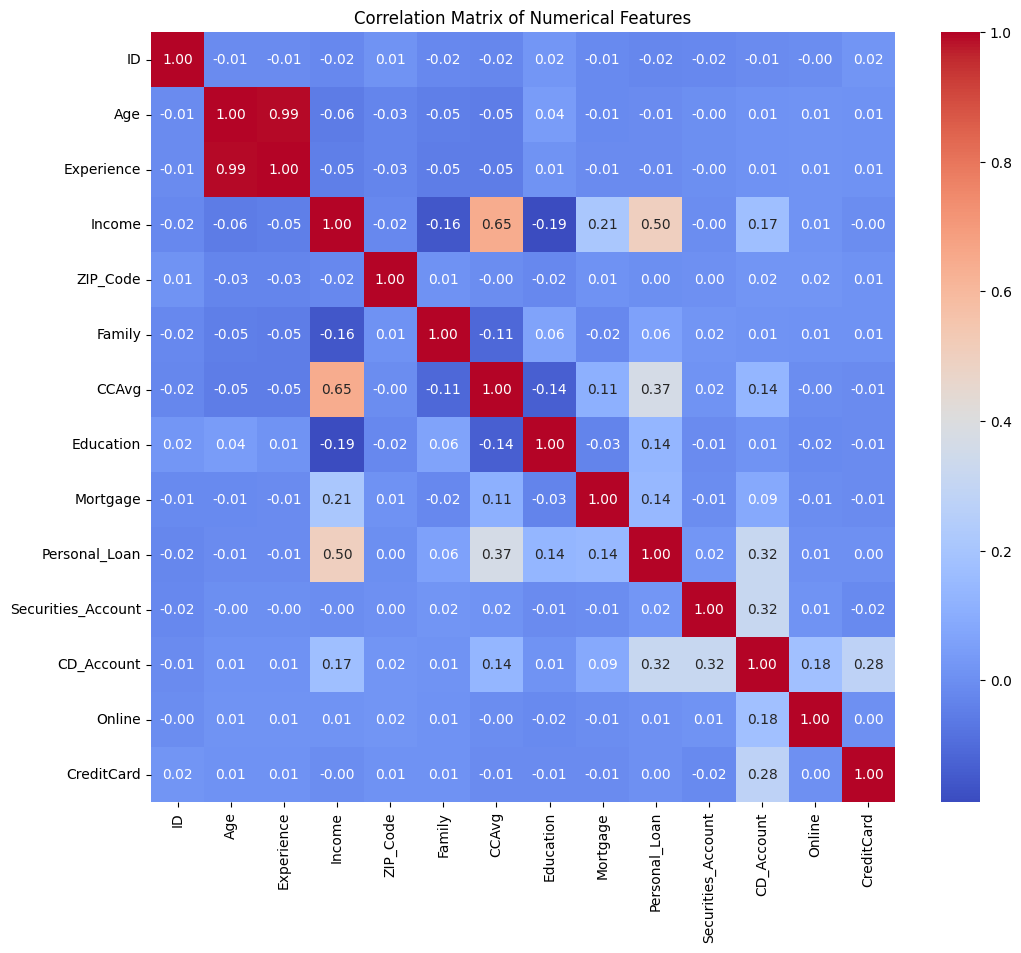

In [20]:
# prompt: give correlation matrix

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

##Naming Dependent Varaiables and Independent Variables

In [12]:
X = df.drop(['ZIP_Code', 'Personal_Loan', 'ID'], axis=1)  # Drop the specified columns along the columns axis
y = df['Personal_Loan']  # Set the target variable

##Model Training and Evaluation

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(random_state=42)) # Added random_state for reproducibility
])
pipeline_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(random_state=42)) # Added random_state for reproducibility
])
pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42)) # Added random_state for reproducibility
])

# Fit the pipelines
pipeline_rf.fit(X_train, y_train)
pipeline_svm.fit(X_train, y_train)
pipeline_lr.fit(X_train, y_train)

# Make predictions
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_svm = pipeline_svm.predict(X_test)
y_pred_lr = pipeline_lr.predict(X_test)

# Evaluate the performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Random Forest Accuracy:", accuracy_rf)
print("SVM Accuracy:", accuracy_svm)
print("Logistic Regression Accuracy:", accuracy_lr)

Random Forest Accuracy: 0.991
SVM Accuracy: 0.976
Logistic Regression Accuracy: 0.955


##Hyperparameter Tuning and Model Optimization

In [24]:
# prompt: Hyperparameter Tuning

# Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10]
}

# Create GridSearchCV object for RandomForestClassifier
grid_search_rf = GridSearchCV(pipeline_rf, param_grid_rf, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score for RandomForestClassifier
print("Best hyperparameters for RandomForestClassifier:", grid_search_rf.best_params_)
print("Best accuracy score for RandomForestClassifier:", grid_search_rf.best_score_)

# Make predictions using the best estimator
y_pred_rf_best = grid_search_rf.best_estimator_.predict(X_test)
accuracy_rf_best = accuracy_score(y_test, y_pred_rf_best)
print("Accuracy of best RandomForestClassifier:", accuracy_rf_best)


# Define the parameter grid for SVC
param_grid_svm = {
    'classifier__C': [0.1, 1, 10],
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__gamma': ['scale', 'auto', 0.1, 1]
}

# Create GridSearchCV object for SVC
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_svm.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score for SVC
print("\nBest hyperparameters for SVC:", grid_search_svm.best_params_)
print("Best accuracy score for SVC:", grid_search_svm.best_score_)

# Make predictions using the best estimator
y_pred_svm_best = grid_search_svm.best_estimator_.predict(X_test)
accuracy_svm_best = accuracy_score(y_test, y_pred_svm_best)
print("Accuracy of best SVC:", accuracy_svm_best)


# Define the parameter grid for LogisticRegression
param_grid_lr = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga'] # solvers that support l1 penalty
}

# Create GridSearchCV object for LogisticRegression
grid_search_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search_lr.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score for LogisticRegression
print("\nBest hyperparameters for LogisticRegression:", grid_search_lr.best_params_)
print("Best accuracy score for LogisticRegression:", grid_search_lr.best_score_)

# Make predictions using the best estimator
y_pred_lr_best = grid_search_lr.best_estimator_.predict(X_test)
accuracy_lr_best = accuracy_score(y_test, y_pred_lr_best)
print("Accuracy of best LogisticRegression:", accuracy_lr_best)

Best hyperparameters for RandomForestClassifier: {'classifier__max_depth': None, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 200}
Best accuracy score for RandomForestClassifier: 0.98575
Accuracy of best RandomForestClassifier: 0.99

Best hyperparameters for SVC: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best accuracy score for SVC: 0.976
Accuracy of best SVC: 0.982


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 


Best hyperparameters for LogisticRegression: {'classifier__C': 1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best accuracy score for LogisticRegression: 0.9522499999999999
Accuracy of best LogisticRegression: 0.954


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


##Model Optimization with RandomForestClassifier and GridSearchCV

In [15]:
# Define hyperparameter grids for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}
#The code you provided has already defined and used a param_grid_rf.  This response will show you how to use that param_grid_rf in a pipeline with GridSearchCV.  It does not redefine param_grid_rf

#The following code will not run without X_train, y_train and X_test being defined. You need to define those variables from your existing code or data

# Create a pipeline with GridSearchCV for RandomForestClassifier
pipeline_rf_cv = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5))
])
# Fit the pipeline with cross-validation and hyperparameter tuning
pipeline_rf_cv.fit(X_train, y_train)
# Access the best hyperparameters and make predictions
y_pred_rf_cv = pipeline_rf_cv.predict(X_test)
# Evaluate the performance
accuracy_rf_cv = accuracy_score(y_test, y_pred_rf_cv)
print("Random Forest Accuracy (with CV):", accuracy_rf_cv)
# Access the best hyperparameters for RandomForestClassifier
best_params_rf = pipeline_rf_cv.named_steps['classifier'].best_params_
print("\nBest Hyperparameters for RandomForestClassifier:")
best_params_rf

Random Forest Accuracy (with CV): 0.992

Best Hyperparameters for RandomForestClassifier:


{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}

##Model Evaluation using Classification Report


In [16]:

# Evaluate the model
classification_rep = classification_report(y_test, y_pred_rf_cv)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       895
           1       0.98      0.94      0.96       105

    accuracy                           0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000



##Assessing Model Generalization: Training vs. Test Accuracy

In [17]:

# Make predictions on the training set
y_pred_train = pipeline_rf_cv.predict(X_train)

# Make predictions on the test set
y_pred_test = pipeline_rf_cv.predict(X_test)

# Calculate accuracy for training set
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training Set Accuracy:", accuracy_train)

# Calculate accuracy for test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test Set Accuracy:", accuracy_test)

Training Set Accuracy: 1.0
Test Set Accuracy: 0.992


##Comparing Actual vs. Predicted Values

In [18]:
# Print actual and predicted values
for actual, predicted in zip(y_test, y_pred_rf_cv):
    print(f"Actual: {actual}, Predicted: {predicted}")

Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 1, Predicted: 1
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predicted: 0
Actual: 0, Predi

##Interpretation
1. **Setting Up the Tools**(Importing Libraries)

This part is like gathering your ingredients before cooking. We're bringing in essential tools (libraries) for:
pandas: Handling data in tables (DataFrames).
matplotlib and seaborn: Creating visualizations.
sklearn: Machine learning tasks (model building, evaluation, etc.).
2.** Getting the Data** (Reading the Dataset)

We load the data from a file (likely a CSV) using pd.read_csv.
This gives us a DataFrame named df that holds our information.
3. **Understanding the Data** (Exploratory Data Analysis)

We use commands like df.info(), df.head(), df.describe(), and visualizations to get a feel for the data:
What kind of information is there?
Are there missing values?
What are the basic statistics (mean, median, etc.)?
We also clean up the column names, making them more code-friendly.
4. **Prepping for Machine Learning** (Naming Independent and Dependent Variables)

We separate our data into:
X: The features (independent variables) we'll use to make predictions.
y: The target (dependent variable) we want to predict (e.g., loan approval).
5. **Building and Training Models**

We create pipelines for three machine learning models:
Random Forest, Support Vector Machine, and Logistic Regression.
Pipelines help us streamline the process of applying preprocessing (like scaling) and training the model.
We train these models on a portion of our data (the training set) using fit.
6. **Evaluating the Models**

We test how well our models perform on unseen data (the test set) using predict.
We use metrics like accuracy to compare the models' performance.
7. **Tuning for Better Performance** (Hyperparameter Tuning)

We use GridSearchCV to find the best settings (hyperparameters) for each model.
This helps us optimize their performance.
8. **Applying the Best Model**

We select the best model and use it to make predictions on new data.
We can further analyze the model's predictions using techniques like classification reports.

In short, the code follows a typical data science workflow:

* Get the Data
* Explore and Clean
* Prepare for Modeling
* Build and Train Models
* Evaluate and Tune
* Apply and Analyze


